<a href="https://colab.research.google.com/github/MWSteams/4590FSP/blob/master/Sedimentation_Hydraulic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sedimentation Hydraulic

Claudia Buchard, Emma Payne, Kevin Sarmiento

[/Monroe/]: # (Excellent! I think you missed my comments in the Executive summary and constraints sections. You have to open the text to see my comments.  You have made excellent progress. Now turn this into a linear design process if at all possible and select parameters, give ranges where there is flexibility, and make a choice. I'd suggest sharing your sed tank layout with the hydraulics team and ask them to design the channels that deliver water to each sed tank. I'm happy to chat at any time!) 


In [1]:
!pip install aguaclara
!pip install molmass

     |████████████████████████████████| 92kB 2.4MB/s 
     |████████████████████████████████| 163kB 8.8MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.1-cp36-none-any.whl size=99466 sha256=1f5661b10f2d00217af01c27295432fb74b6737e7963a65f48ddffdbb34a6e30
  Stored in directory: /root/.cache/pip/wheels/7f/ff/4f/10d76e6a261d392aefbdf6ce8d3d5519e924dc334b102ca49b
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=dc7a6e089a0c082e427910bcd457e3aca8bed2e5f48a2481b96a0b88026a1b39
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint
     |████████████████████████████████| 71kB 2.1MB/s 


In [2]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import molmass as mol
!wget https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
import Fairmont as fmt

--2020-05-05 12:45:49--  https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3025 (3.0K) [text/plain]
Saving to: ‘Fairmont.py’

Fairmont.py         100%[===================>]   2.95K  --.-KB/s    in 0s      

2020-05-05 12:45:49 (45.8 MB/s) - ‘Fairmont.py’ saved [3025/3025]



# Task Definition

The overall project has three main goals: 

1. To improve the source water quality of the LAAFP and lighten the burden on its filters by building a sedimentation plant upstream, 
2. To eliminate the need to operate the Cottonwood Treatment Plant and 
3. To mitigate the risk associated with arsenic sediment build up in the North Haiwee Reservoir. 

The goal of our team’s project is to design a sedimentation system with a floc blanket that can treat arsenic, TOC, and turbidity to allowable limits while maintaining high efficiency and minimizing space requirements at the treatment plant. This sedimentation system must be able to treat a design flow of 720 CFS and operate efficiently under a variety of turbidity, arsenic, TOC and emerging contaminant conditions. To complete this task we will need to decide on a set of design variables such as plan view area of the sedimentation tank, the geometry of the tank, upflow velocity, number of treatment trains, depth of the floc blanket, the physics of the diffusers in the resuspension system and the height of the floc hopper, as well as constraints for the plate settlers. With these variables decided we must then confirm that the flocculation-sedimentation system can treat the contaminants to allowable limits for various flow and concentration conditions.

# Executive Summary 




The sedimentation tank must be able to process a design flow of 720 CFS to be sent to the LAAFP. The estimated influent water quality of 55 μg/L of arsenic, 4 mg/L of TOC, and 23 NTU of turbidity must be reduced to 10 μg/L, 3mg/L, and 3 NTU in order to meet the client standards. The proposed plan view area for the sedimentation tanks is 250' X 510', making maximum upflow velocity of the system 1.7 mm/s, and the surface loading rate is 0.5 gpm/ft^2. However, these values may be altered to create a better functioning system. The overall sedimentation tanks must be easily accessible for operations and maintenance, so must have adequate platforms and walkways for visibility. 

[/Monroe/]: # (What else could you add as high level summary? How about something about reducing the number of moving parts, improving the performance of the sedimentation tanks with a floc blanket, and ... ?)

[/Monroe/]: # (Define what is meant by surface loading rate and show that number in mm/s as well. Good work doing some design calculations, but why didn't you use python to calculate these values? Goal is to get to the place where you default to python as your calculator of choice!)

[/Monroe/]: # (There is a nice table below with the influent and effluent water quality and so no need to restate that in this paragraph)


# Constraints


Constraint information taken from [Fairmont Sedimentation Plant Scope of Work Document](file:///C:/Users/Claudia/Downloads/Fairmont%20Sedimentation%20Plant%20Scope%20of%20Work%20_FINAL%2006-01-17.pdf) and [AguaClara Textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Derivations.html#floc-blanket-design)
## Relevant regulations

- Permits required found in section X of document

- "The velocity of flocculated water through pipes or conduits to settling basins shall be no less than 0.5 nor greater than 1.5 feet per second. Allowances must be made to minimize turbulence at bends and changes in direction." [10 State Standard](https://www.health.state.mn.us/communities/environment/water/docs/tenstates/waterrev2012.pdf)


* client expectations

>>Fairmont WTP will pre-treat incoming waters from LAA1, LAA2, and SWP-E then send them to the LAAFP for final treatment. 

>>Must eliminate the need for the Cottonwood Treatment Plant, thus preventing arsenic sedimentation in the North Haiwee Reservoir.

>> Must be capable of treating 720 cfs

>>Treatment standards: 

| Contaminant | Design Influent Water Quality  | Fairmont Sedimentation Plant Settled Water Goal | 
|---|---|---|
| Arsenic (μg/L) | 55 | 10 |
| TOC (mg/L)| 4 | 3 |
|Turbidity (NTU) | 23 | 3 |


* Site

>>Water system-owned Fairmont Reservoir property

>>Ave H and 170th street, Lancaster, CA

>>Zone A-2-2, heavy agricultural

>>250’ x 510’ proposed area for sedimentation- may want to break this constraint and use a larger area to use a smaller upflow velocity


* budget

>>Estimated to cost $220 million for the whole project

* process capabilities including process design equations

>>See **Physics** section


* ease of use 

>>Adequate floc hopper height for easy sludge removal

* operation requirements

>>ferric chloride and a cationic polymer in flocculation

>>Follows rapid mix and flocculation

>>Estimated 416 hrs/year of treatment operations


* maintainence requirements

>>Walkways and platforms for easier maintenance and operation, open top for visibility

>>Estimated 288 hrs/year of maintenance and construction hours

* geometry/size requirements

>>Surface loading rate for plate settlers- 0.5 gpm/ft^2, 0.339 mm/s 

>>Surface loading rate for AguaClara: 0.12mm/s

>>60 degree angle for sedimentation tank

>>Sedimentation tank 7m X 1m for AguaClara

>>1/8th-¼ of an inch diffuser width minimum to make sure all particles can pass through

>>Roughly less than 1cm of headless through diffusers

>>1.7 mm/s upflow velocity if we use their plan view area, may want to use 1 mm/s instead to make it comparable to AguaClara sedimentation tanks


# Physics

Our goal is to design a sedimentation tank for the LAAWTP with many of the features of an AguaClara sedimentation tank. This would include a floc blanket and the bottom geometry used in current AguaClara sedimentation tanks. However, due to the large flow rate required for this plant a few features will be modified to be more efficient with space. We are looking to increase the overall size of each sedimentation unit from the AguaClara standard of 7 meters length and 1 meter width. To do this we will design a sedimentation tank with multiple influent manifolds and jet reversers. We will optimize the overall size and number of manifolds and reversers to reduce the overall footprint and material use. 

## Manifolds and diffusers 
One of the important things we need to design are the inlet manifolds and diffusers. The following are relevant equations that we will use for the design. 

Equation 645 in [AguaClara textbook](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html?highlight=manifold#equation-sed-diffuser-jet-velocity) is used to calculate the width of a diffuser based on the design upflow velocity and sedimentation tank dimensions.

$$W_{diffuser} = \frac{V_{floc Blanket} W_{Sed} B_{Diffuser}}{V_{Jet} S_{Diffuser}} $$

The velocity of the jet from the diffuser is determined from the desired head loss. This is important because the greater the head loss at the diffusers the more uniform the flow throughout the entire length of the manifold that feeds the diffusers. 

Headloss from diffusers: 
$$H_{L\space Diffuser}= \frac{V_{Jet}^2}{2g}$$

The following equation is the ratio between port velocity and manifold velocity from [AguaClara textbook](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html?highlight=manifold#equation-manifold-max-v-no-hl-series). This is an important design equation because it ensures that we have as uniform flow as possible. Keeping flow uniform helps prevent undesired circulations in the sedimentation tank which can lead to decreased performance. Additionally, this equation will be important when designing the piping between sedimentation basins. We would want to ensure even distribution between each sedimentation units.

$$\frac{\bar v_{P}}{\bar v_{M_1}} = \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}$$

Where $\Pi_{Q}$ is the ratio of flow between the first and last oriface in the manifold which we like to keep at around a value of 0.85. 

$$\Pi_{Q} = \frac{Q_{Diffuser \space 1 }}{Q_{Diffuser \space n }}$$



##Plate settlers
Plate settlers are important for verticle flow sedimentation tanks because they allow for greater removal efficiencies compared to vertical flow sedimentation tanks without them. The following equation is for finding length of plate settlers [AguaClara Textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Derivations.html#equation-sedimentation-sed-derivations-8) based on design parameters described below.

$$L = \frac{S\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}-1\right) + T\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}\right)}{sin\alpha cos\alpha}$$
where:
- $S$ is spacing between plates
- $T$ is the thickness of the plates
- $v_{up}$ is the upflow velocity
- $v_c$ is the capture velocity
- $\alpha$ is the angle of the plate settlers

For most of these variables we will be using the same constants that have been used in previous AguaClara plants. Some of these constants are not yet optimized and therefore require further research into how they affect overall plant performance. 

## Particle sedimentation 
To find the terminal velocity of single particles in the sedimentation tank and plate settlers we can use the following equation if the flow regime is laminar. Retrieved from [AguaClara textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Intro.html#equation-sedimentation-sed-intro-3)

$$ V_t = \frac{gD^2}{18\nu}\frac{\rho_{floc} - \rho_{H_2O}}{\rho_{H_2O}}$$

If flow is turbulent the the terminal velocity equation will be as follows: 
$$v_t = \sqrt{\frac{4}{3}\frac{gD}{C_D}\frac{(\rho_{floc}-\rho_{H_2O})}{\rho_{H_2O}}} $$ 
where $ C_D = \frac{24}{Re}(1+0.150Re^{0.681})+\frac{0.407}{1+ \frac{8710}{Re}} $

### Floc sedimentation 
To find the terminal velocity of flocs which are agrigates of primary particles we use the following equation: 
$$ v_t = \frac{D_0^2g}{18\Phi\nu}\frac{\rho_{floc_0} -\rho_{H_2O}}{\rho_{H_2O}} \left( \frac{D}{D_0} \right) ^{D_{fractal}-1} $$ Retrieved from eq. 405 in the [AguaClara Textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Intro.html#equation-sedimentation-sed-intro-6)

With this we can get an approximation of the smallest size floc that our sedimentation tank can capture. 

##Tank geometry
We will using trigonometry to optimize the bottom geometry of the sedimentation tank. 

## Floc hopper 

The development of a model for sludge accumulation in the floc hopper would be useful. This would help us make decisions about the size and storage capacity that we should plan for in the floc hopper. Additionally, it would be informative for the operators to know how often to purge the floc hopper of sludge. 

# Table listing potential strategies to meet the constraints and treatment objectives


| strategy | advantages  | disadvantages | data needed for decision |
|---|---|---|---|
| Experience + physics | high potential for success | requires knowledge | lots |
| Playing with geometry| Can lead to simple and elegant designs | Requires a lot of imagination | Clear constraints|

# Vendors and contact information file

See this [tab delimited spreadsheet](https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt).

Add rows to the vendor spreadsheet as you find them. The sheet can easily be edited in Excel. Just make sure to save it as a tab delimited sheet. Push your changes to github so the entire class has access to the document.



In [0]:
vendors = pd.read_csv('https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt',sep='\t')
vendors

,item description,vendor,contact first name,contact last name,vendor website,product info,date of contact,who made the contact,notes
0,plate settlers,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/literaturemedia/...,4/16/2020,Ian Cullings,NaN
1,sludge removal system,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/products/hoseles...,4/16/2020,Ian Cullings,NaN
2,plate settlers,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,https://www.monroeenvironmental.com/water-and-...,4/16/2020,Ian Cullings,NaN
3,sludge removal system,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,http://www.monroeenvironmental.com/water-and-w...,4/16/2020,Ian Cullings,NaN
4,plate settler with hopper,Parkson,still,pending,https://www.parkson.com/,https://www.parkson.com/products/lamella-ecoflow,4/16/2020,Ian Cullings,Includes sloped sludge hopper in design
5,rapid mixer (mech),Dynamix,still,pending,https://www.dynamixinc.com,https://www.dynamixinc.com/industries/waste-wa...,4/16/2020,Lynn Li,NaN
6,rapid mixer (mech),Meurer Research,still,pending,http://www.meurerresearch.com,http://www.meurerresearch.com/products/mixer/,4/16/2020,Lynn Li,NaN
7,rapid mixer (mech),Philadelphia Mixing Solutions,still,pending,https://www.philamixers.com,https://www.philamixers.com/industries/water-w...,4/16/20,Lynn Li,NaN


# Shared assumptions

See this [python file, Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py)

Use this file to hold parameters that are in the SOW or elsewhere that
influence the design of the entire plant. This provides an easy mechanism
for all of us to share the same assumptions. Read the SOW to find sections that relate to your part of the design and enter all pertinent variables into [Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py) and then push those changes to github.

# Major Decisions

Write several paragraphs describing the major decisions that you will need to make in order to create a design and outline a strategy for how you will obtain the necessary information to make those decisions.

[/Monroe/]: # (It would be useful to add some of your reflections in the previous and next paragraphs. Those reflections then guide your next steps.)

# Next Steps and Challenges

Summarize the next steps that you will be taking to move the design forward. Identify any challenges where you may need assistance.

# Design



In [0]:
print('The average flow to be treated at Fairmont is',fmt.q_ave.to(u.Mgal/u.day),'or')
print('The maximum flow to be treated at Fairmont is',fmt.q_max.to(u.Mgal/u.day))
specific_energy = (fmt.electricity_power/fmt.q_ave).to(u.J/u.L)
temp = 15 * u.degC
specific_potential_energy = (specific_energy / u.gravity / ac.density_water(temp)).to(u.m)
print('The average amount of energy used per liter of water is expected to be',specific_energy,'or',specific_potential_energy,'of potential energy')

The average flow to be treated at Fairmont is 206.8 megagallon / day or
The maximum flow to be treated at Fairmont is 465.3 megagallon / day
The average amount of energy used per liter of water is expected to be 118.1 joule / liter or 12.05 meter of potential energy


In choosing the number of sedimentation units and their size it is important to consider a few constrains. If a plant has many smaller sedimentation units then it would be combersome and inefficient to run them all. However, having smaller units allows operators to more precisly control the upflow velocities in the active sedimentation tanks if the total water demand increases or drops. At the other end of the spectrum, if there is a small number of very large sedimentation units then it would be easier for operators to control those few units. However, if there is a need to take one unit offline then the total production decreases at a higher percent of the total flow than with smaller units. Somewhere in between is the "ideal". Based on this notion, we propose the Fairmont Sedimentation Plant use 8 sedimentation units. To find the dimensions of each unit we must define the maximum operating upflow velocity in the sedimentation units. 

The sedimentation tanks that we are designing are vertical upflow sed tanks that will have a fluidized/suspended bed of flocs in what we call a floc blanket. The upward velocity in the sedimentation tanks will impact whether or not a floc blanket can be formed. If the upflow velocity is too high then only the very large flocs will be captured by the plate settlers, no floc blanket will form, and plant performance will drop below desired. AguaClara designs sedimentation tanks with floc blankets and upflow velocities of 1 mm/s. This design has proven to be very effective at producing effluent turbidities below 1 NTU. Given the design max flow rate of this plant and the space constrictions a higher upflow velocity is considered for sedimentation. In 2015, Casey Garland, a Ph.D. student working on floc blanket research carried out experiments to test if higher Energy Dissipation Rates(EDR) at the injection site of the sedimentation tank affected performance. She carried these lab scale tests out at 1.2 mm/s and 1.6 mm/s upflow velocities with great performance. This is promising because it allows us to increase the maximum upflow velocity from 1mm/s to 1.6 mm/s at the Fairmont plant. 

Based on the maximum upflow velocity, maximum design flow rate of 720 cubic feet per second, and the number of units we want (8) we calculated each unit would be 40 meters long by 39.8 meters wide. It would perhaps be alright to round the dimensions out to 40 x 40 meters to make the tanks uniform. The total active sedimentation area required for all 8 units is 12,800 square meters. While this is more area than what the Scope of Work alocated for the sedimentation units, 11,850 square meters, we believe it is still feasible. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/FSP_sed_tank_top_view_1.0.JPG" height=400>
</p>
<p align="center">

**Figure 1:** A bird's-eye view of the proposed sedimentation unit with floc hopper channel visible and preliminary dimensions

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/FSP_sed_tank_side_view_1.0.JPG" height=250>
</p>
<p align="center">

**Figure 2:** A side view of the proposed sedimentation unit with floc hopper channel visible and bottom geometry

The following code illustrates how the dimensions of the tank were calculated. It also shows that this preliminary design is feasable in a number of ways. The first thing we wanted to check was the range of flow rates that this plant could operate in. We are designing the plant so that it could meet all the treatment goals at maximum capacity. However, the plant will operate at a range of different flow rates. To predict if this would be an issue we created code that allowed us to easily find the upflow velocities at different flow rates with different number of sedimentation units online. 

We saw that when the plant is operating at its average flow rate of 9.06 cubic meters per second and all sed units are in operation the resulting upflow velocity is 0.71mm/s. There is no evidence suggesting a floc blanket could not form at this slower velocity. However, we were concerned that the reduced flow rate in each tank would make it more difficult for the jet reverser to resuspend settling flocs and as a result begin to fill with sludge. This would be a failure mode and we want to avoid this. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/screenshot_jet_reverser_Garland_2015.JPG" height=250>
</p>
<p align="center"> 

**[(Garland, 2015)](https://www.researchgate.net/publication/287358758_Influence_of_Variable_Inlet_Jet_Velocity_on_Failure_Modes_of_a_Floc_Blanket_in_a_Water_Treatment_Process_Train)**

Casey Garland examined this failure mode in her Ph.D thesis and concluded that in order to prevent flocs from filling up the jet reverses an Energy Dissipation Rate (EDR) above ~1 mW/kg was desired. 

$$\epsilon_{Jet} = \frac{(\Pi_{Jet}V_{Jet})^3}{D_{Jet}} $$

**[(Garland, 2015)](https://www.researchgate.net/publication/287358758_Influence_of_Variable_Inlet_Jet_Velocity_on_Failure_Modes_of_a_Floc_Blanket_in_a_Water_Treatment_Process_Train)**



<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/jet_reverser_Garland_2015.JPG" height=300>
</p>
<p align="center">

We will use this as a design constraint as we move towards the design of the diffusers and jet reversers. 

[/Monroe/]: # (I contend that the failure to resuspend the settled flocs is due to a lack of momentum. Thus I'd take the case that Casey described as failing and find the jet momentum per plan view area of the sedimentation tank. I think this simplifies to a minimum velocity that is required to resuspend the settled flocs. I think this minimum velocity is independent of the sed tank valley width. This minimum velocity IS a function of the floc blanket concentration and thus at the minimum flow for a sed tank the floc blanket will be more concentrated AND the jet velocity will be reduced. Thus the critical design for the jet velocity is at the minimum flow rate.)

In [0]:
# calculations for finding size of sedimentation unit based on the number sed 
# units desired for the entire plant 

max_V_up = 1.6*u.mm/u.s
length_sed_unit = 40*u.m
max_num_sed_units = 8
width_sed_unit = fmt.q_max / (max_V_up * length_sed_unit *max_num_sed_units)
print('Based on limiting parameters the sedimentation tank dimensions are: Length-' +str(length_sed_unit.to(u.m)) +
      ' and width-'+ str(width_sed_unit.to(u.m)) )

area_sed_tanks = (length_sed_unit * width_sed_unit * max_num_sed_units).to(u.m**2)
planned_area_fairmont = (250 * 510 *u.feet**2).to(u.meter**2) # From Scope of Work 
print ('Total active area for hydraulic sed tank design is '+str(area_sed_tanks) + ' while the planned are was '+str(planned_area_fairmont))

Q_max_sed_hydraulic_unit = (1.6*u.mm/u.s * length_sed_unit * width_sed_unit).to(u.megagallon/u.day)
print('Each sedimentation unit can treat up to '+str(Q_max_sed_hydraulic_unit))

# This function calculates the upflow velocity of all the sedimentation basins 
# that are online based on plant total flow rate and the number of sedimentation
# units online at that moment. This is useful because we would want to ensure that 
# we can meet peak and average demand and do it while staying between a min and max 
# upflow velocity. 

def upflow_velo_sed(Q ,num_sed_units, length_sed_unit,width_sed_unit ):
  return (Q / ( num_sed_units *length_sed_unit * width_sed_unit)).to(u.mm/u.s)

num_sed_units = 8 # This value can be changed to see how removing sed units affects upflow velo in the other tanks and the EDR at the jet reverser 
Q_example = fmt.q_ave.to(u.m**3/u.s)
V_up_sed = upflow_velo_sed( Q_example, num_sed_units, length_sed_unit , width_sed_unit)
print ('When the plant flow rate is '+str(Q_example) +' and '+str (num_sed_units)+
       ' out of '+str(max_num_sed_units)+ 
       ' sedimentation tanks are online, then the upflow velocity in those tanks is ' +str(V_up_sed))


# Jet reverser Energy Dissipation Rate
# Perhaps this could be used as a constraint. 
# if EDR gets too low, we can have issues resuspending flocs and an accumulation of 
# sludge can occur at the bottom of the tank 
# Garland et al show good performace at every EDR except 0.25 mW/kg due to the jet reverser 
# becoming filled. The next EDR sucessfully tested was ~1mW/kg. This will be set as the minumum for our design

# function to calculate the EDR from a jet reverser: from Garland 2015 
def EDR_jet(pi_jet , upflow_velo_sed , width_jet, width_section):
  V_jet = width_section * upflow_velo_sed / width_jet  # velocity of the reversed jet  
  return (pi_jet* ((V_jet)**3 / width_jet)).to(u.milliwatt/u.kg)

pi_jet_circular = 0.5
pi_jet_plane = 0.23 # from Garland 2015 
width_jet = 10*u.mm # this is determined by the diameter or width of the diffuser slot which we can change
width_section = 1.5*u.meter # spaceing between jet reversers is adjustable: traditional AC plants it is 1 meter
EDR_sed_unit = EDR_jet(pi_jet_plane , V_up_sed , width_jet, width_section)

print ('For a sed tank with upflow velocity of '+str(V_up_sed)+' sectional width of '+ 
       str(width_section)+' and jet width of '+str(width_jet)+' the EDR is '+str(EDR_sed_unit))

Based on limiting parameters the sedimentation tank dimensions are: Length-40 meter and width-39.82 meter
Total active area for hydraulic sed tank design is 1.274e+04 meter ** 2 while the planned are was 1.185e+04 meter ** 2
Each sedimentation unit can treat up to 58.17 megagallon / day
When the plant flow rate is 9.061 meter ** 3 / second and 8 out of 8 sedimentation tanks are online, then the upflow velocity in those tanks is 0.7111 millimeter / second
For a sed tank with upflow velocity of 0.7111 millimeter / second sectional width of 1.5 meter and jet width of 10 millimeter the EDR is 27.91 milliwatt / kilogram


## Size of Manifolds


As a reality check we will be calculating the diameter of the manifolds that supply water to the sedimentation tanks. Traditional AguaClara plants are about 6 meters long but our proposed sedimentation tanks are 40 meters long. This means that each trunk of a sedimentation manifold must supply a much larger quantitiy of water and therefore will have a larger diameter. If those diameters get too large they can take up a large fraction of the sedimentation unit itself and that could become a failure mode. 

This analysis begins with the following equation which describes the ratio between the velocity leaving the ports, $\bar v_{P}$ , and the velocity in the manifold, $\bar v_{M_{1}}$ . This equation assumes that the head loss due to friction in the pipe is small. 

$$\frac{\bar v_{Jet}}{\bar v_{M_1}} = \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}$$
From [AguaClara Textbook Equation 643](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html#equation-manifold-max-v-no-hl-series)

Where $ \Pi = \frac{Q_{port \space 1}}{Q_{port \space n}} $ which describes the ratio of flow between the first and last ports on the manifold. AguaClara typically uses 0.85 in their designs and that has shown great results. 

The velocity of the flow out of the diffuser will be set by the desired upflow velocity in the sedimentation tank($\bar v_{FB}$), the width of the section which the manifold supplies water to ($ W_{Sed  \space section}$), and the width of the diffusers ($W_{Diffuser}$).

<p align="center">
  <img src="https://aguaclara.github.io/Textbook/_images/BvsS_diffuser.png" height=150>
</p>
<p align="center">


$$\bar v_{Jet}  = \frac{\bar v_{FB} W_{Sed  \space section} B_{Diffuser}}{W_{Diffuser} S_{Diffuser}}$$
from [AguaClara Textbook Equation 645](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html#equation-sed-diffuser-jet-velocity) 

If the thickness of the diffuser wall is small then we can simplify the equation to: 

$$\bar v_{Jet}  = \frac{\bar v_{FB} W_{Sed  \space section} }{W_{Diffuser} }$$
and now solve for the velocity in the manifold as a function of velocity of the jet and the ratio of flows shown above: 

$$v_{Manifold} = \frac {v_{Jet}}{\sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}}$$

[/Monroe/]: # (I edited the previous equation to make it explicitly a function of the flow ratio.)

To find the diameter of the manifold we now relate the required flow rate in the section to the calculated velocity in the manifold. 

$$Q_{Sed\space section} = L_{Sed} W_{sed \space section} V_{up}$$
$$D_{Manifold} = \sqrt{\frac{4 Q_{Sed\space section}}{\pi v_{Manifold}}}$$

The following code outputs a direct comparisson between the FSP design and a traditional AC design. Three main design perameters are compared: manifold diameter, ratio between manifold diameter and the width of the sedimentation portion which that manifold serves, and head loss in the manifold. 

The head loss in the diffusers sets the width of the diffusers
$$v_{diffuser} = \sqrt{2gH_L}$$
$$W_{diffuser} = \frac{v_{up} W_{sed \space section}}{v_{diffuser}}$$


In [0]:
def Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_flow):
  return np.sqrt((Ratio_flow**2 + 1)/(2*(1-Ratio_flow**2)))

def manifold( v_up , width_section_eq , length_sed , Ratio_flow, HL_diff):
  max_diffuser_vel = ((2*u.gravity*HL_diff)**(0.5)).to(u.m/u.s) # velo of the jet determined by desired HL 
  W_diffuser_min = ((v_up / max_diffuser_vel) * width_section_eq)
  v_Influent_Manifold = max_diffuser_vel / Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_flow)
  Q_section =(length_sed * width_section_eq * v_up)
  ID_min_Influent_Manifold = ac.diam_circle(Q_section/v_Influent_Manifold)
  return ID_min_Influent_Manifold.to(u.inch) , Q_section.to(u.L/u.s) , W_diffuser_min.to(u.cm)


Nu = ac.viscosity_kinematic_water(temp)
max_V = 1.6*u.mm/u.s
length_sed_unit_FSP = 20*u.m # optimization variable 
width_section = 1*u.m # optimization variable

Ratio_flow = 0.85 # based on flow of first and last port in diffuser 
W_Diffuser = 3 * u.mm # This is the width of traditional AC plant's diffusers 
v_FB = 1 * u.mm/u.s # upflow velo of traditional AC plant 
W_Sed_AC = 1.07 * u.m # width of traditional AC plant 
L_Sed_AC = 6*u.m # Length of traditional sed tank 
Roughness = 0.002*u.mm # PVC pipe roughness
KMinor_manifold = 2 

# set the head loss in the diffusers to a constant and then use that to calculate the velo out of jet 
HL_diff_AC = 1*u.cm
HL_diff_FSP = 5*u.cm

manifold_FSP = manifold( max_V , width_section , length_sed_unit_FSP  , Ratio_flow, HL_diff_FSP)
manifold_AC = manifold( v_FB , W_Sed_AC , L_Sed_AC  , Ratio_flow, HL_diff_AC)
# based on the flow and the head loss constrain the width of the diffuser is determined
W_diffuser_min_AC = manifold_AC[2]
W_diffuser_min_FSP = manifold_FSP[2]

## to test feasability I want to check what percent of the sed width is traversed by the manifold 

ratio_manifold_sed_AC = (manifold_AC[0] / W_Sed_AC).to(u.dimensionless)
ratio_manifold_sed_FSP = (manifold_FSP[0] / width_section).to(u.dimensionless)

# number of diffusers based on standard AC diffuser width design 
diffuser_width = 5*u.cm # based on aproximate AC design 
n_diffusers_AC = (L_Sed_AC / diffuser_width).to(u.dimensionless)
n_diffusers_FSP = ( length_sed_unit_FSP/ diffuser_width).to(u.dimensionless)

# Head loss in manifold function from AC Core 
head_loss_manifold_AC_2 = ac.headloss_manifold(manifold_AC[1], manifold_AC[0], L_Sed_AC , KMinor_manifold, Nu, Roughness,NumOutlets = n_diffusers_AC )
head_loss_manifold_FSP_2 = ac.headloss_manifold(manifold_FSP[1], manifold_FSP[0], length_sed_unit_FSP, KMinor_manifold, Nu, Roughness, NumOutlets=n_diffusers_FSP )


print('Diameter manifold in AC plant is '+str(manifold_AC[0])+', flow rate of '+str(manifold_AC[1])+
      ', manifold to sed tank width ratio '+str(ratio_manifold_sed_AC)+' and headloss of '+str(head_loss_manifold_AC_2.to(u.cm)) )
print('Diameter manifold in FSP plant is '+str(manifold_FSP[0])+', flow rate of '+str(manifold_FSP[1])+
      ', manifold to sed tank width ratio '+str(ratio_manifold_sed_FSP)+' and headloss of '+str(head_loss_manifold_FSP_2.to(u.cm)) )

# What amount of head loss in the manifold is acceptable? Should we try to keep the head loss as low as in the AC designs? 
# if we do that then we can set the head loss in diam_manifold_FSP equal to head_loss_manifold_AC_2
# more head loss in the pipe could probably help flow distribution and counter the pressure recovery 


Diameter manifold in AC plant is 7.099 inch, flow rate of 6.42 liter / second, manifold to sed tank width ratio 0.1685 dimensionless and headloss of 0.2967 centimeter
Diameter manifold in FSP plant is 10.6 inch, flow rate of 32 liter / second, manifold to sed tank width ratio 0.2692 dimensionless and headloss of 1.755 centimeter


The code above only looks at one specific sedimentation tank with a specified length, width, and diffuser head loss. 

The code below outputs three graphs that help us make a better decision on the dimensions of the sed tank. 
- The first graph shows the relationship between the diameter of the manifold and the length of the sed tank , the width of the sed tank, and the headloss in the diffusers 
- The second graph shows the ratio between manifold diameter and the width of the sedimentation portion which that manifold serves as a function of length of the sed tank , the width of the sed tank, and the headloss in the diffusers
- The third graph shows the head loss in the manifold as a function of length of the sed tank , the width of the sed tank, and the headloss in the diffusers

A constraint has been added to remove any configuration that results in a jet diffuser width less than 3mm. Anythings smaller than 3 mm could pose a risk to clogging. This constraint can be revised if we get feedback that it should be bigger or smaller. 

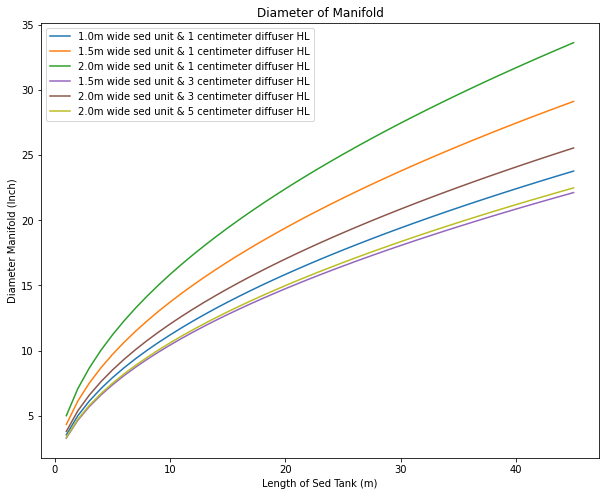

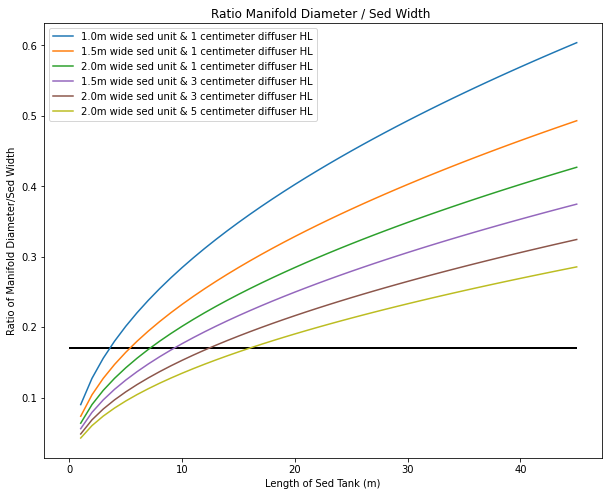

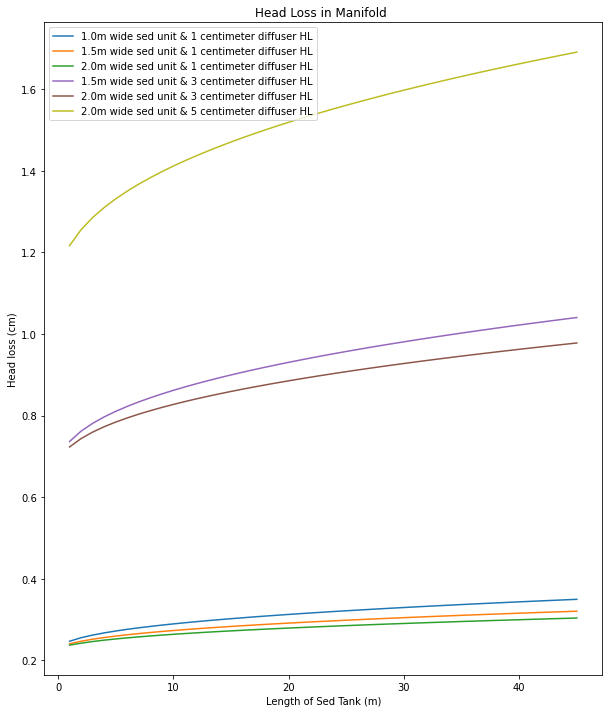

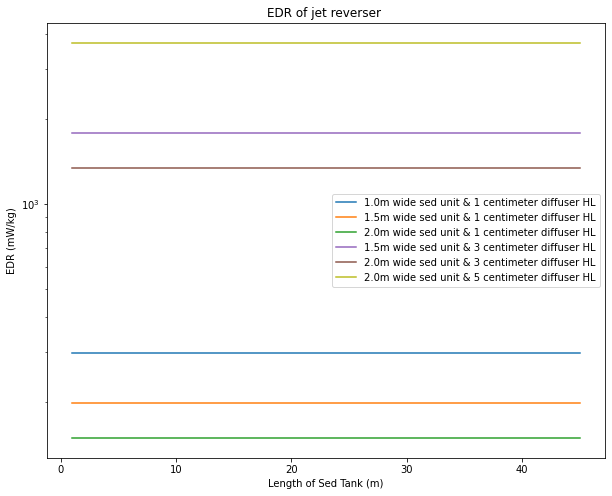

In [0]:
#### Plotting different manifold characteristics
#calculate diameter, flow rate and head loss for a range of manifold lengths, widths, and diffuser head losses

def manifold_parameter_graph( V_up_FB ,Ratio_flow , HL_diffuser ,KMinor_manifold , Nu, Roughness ):
  for w_sed_unit in np.arange(1,2.5,0.5)*u.m:
    n_test_values = 45 # this sets the maximum length of the sed tank to test
    # pi jet in Casey Garland's 2015 paper is 0.23 for a plane jet???
    pi_jet = 0.0124 # https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html#id17 
    D =[] 
    lengths=[]
    headloss=[]
    Q=[]
    EDR = []
    manifold_sed_ratio = []
    w_sed_unit_1 = []
    # opted for using np.linspace instead of range 
    for length_sed in np.linspace(1 , n_test_values  , n_test_values)*u.m:
      # edited the manifold function to add the desired headloss in diffusers 
      manifold_d = manifold(  V_up_FB , w_sed_unit , length_sed  , Ratio_flow, HL_diffuser)
      if manifold_d[2].magnitude >= 0.3 : # diffusers with slots smaller than 3mm can easily clog so we remove any outcome with slots less than 3mm 
        lengths.append(length_sed.magnitude) # (in meters)
        D.append(manifold_d[0].magnitude) # (in inches)
        Q.append(manifold_d[1].magnitude) # (in L/s)
        # Head loss equation we need to use is the one for manifolds
        # Within that equation we cannot call manifold_FSP because that variable contains the values for the length specified outside of this for loop
        # instead we should reference manifold_d[0] and manifold_d[1]
        n_diffusers = round(( length_sed/ manifold_d[2]).to(u.dimensionless))
        hl = ((ac.headloss_manifold(manifold_d[1], manifold_d[0], length_sed, KMinor_manifold, Nu, Roughness, n_diffusers )).to(u.cm)) # hl in cm
        manifold_sed_ratio.append((manifold_d[0]/w_sed_unit).to(u.dimensionless))
        headloss.append(hl.magnitude)
        energy_diss_rate = (EDR_jet(pi_jet , V_up_FB ,manifold_d[2] , w_sed_unit)).to(u.mW / u.kg)
        EDR.append(energy_diss_rate.magnitude)



    
    plt.figure(1,[10,8])
    # We dont want to label the options that result in jet widths smaller than 3mm
    if manifold_d[2].magnitude >= 0.3 :
      string = str(w_sed_unit.magnitude)+'m wide sed unit & '+str(HL_diffuser)+' diffuser HL'
    else:
      string='' 
    plt.plot(lengths,D,label=string)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Diameter Manifold (Inch)')
    plt.title('Diameter of Manifold')
    plt.legend()
      
    plt.figure(2,[10,8])
    plt.plot(lengths,manifold_sed_ratio,label=string)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Ratio of Manifold Diameter/Sed Width')
    plt.hlines(0.17,0,45 , 'black',)
    plt.title('Ratio Manifold Diameter / Sed Width ')
    plt.legend()

    plt.figure(3,[10,12])
    plt.plot(lengths,headloss,label=string,)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Head loss (cm)')
    plt.title('Head Loss in Manifold ')
    plt.legend()

    plt.figure(4,[10,8])
    plt.plot(lengths,EDR,label=string,)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('EDR (mW/kg)')
    plt.title('EDR of jet reverser ')
    plt.yscale('log')
    plt.legend()



# Running the function for various head loss values. The values can be changed 
for i in  np.linspace(1 ,5,3)*u.cm:
  manifold_parameter_graph( max_V ,Ratio_flow , i, KMinor_manifold , Nu, Roughness )

### Observations of the graphs
If you take a look at the first group of graphs, the one that looks at the diameter of the manifold, we actually see that you can increase the width of the valley without increasing the diameter significantly. In fact, in some scenarios a wider valley led to a smaller ratio between diameter of the pipe and tank width. This would translate to less pipe used in the entire system. However, a wider valley would translate to higher peak which would require more concrete. We have not factored in the added concrete needed if we increase the width of the valleys. 

The constraint that we put on the graph to ensure the width of the diffuser was not smaller than 3mm also had important implications. We can see that as the desired head loss in the diffuser increases, the valley width needed to ensure the diffuser width is larger than the constrain also increases. 1 cm head loss at the diffuser can be obtain with valley widths larger than 1 m. However, to obtain a head loss of 3cm the valleys have to be larger than 1.5 m wide and for 5cm head loss the valley needs to be nearly 2m wide. 

The graph showing the ratio Manifold diameter to sed width is helpful for putting the diameters of the manifold into context. The horizontal black line is the manifold diameter:sed width ratio in typical AC plants. A smaller ratio translates to less total pipe length used in all the sedimentation basins. 







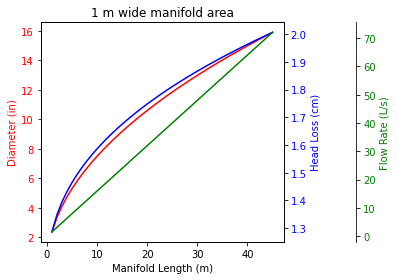

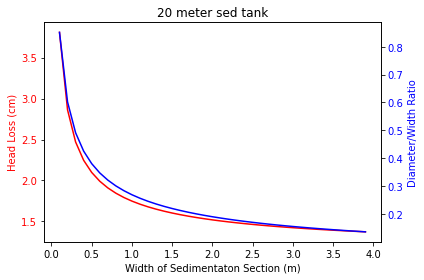

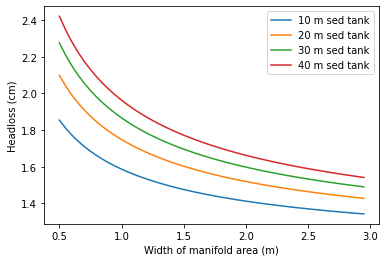

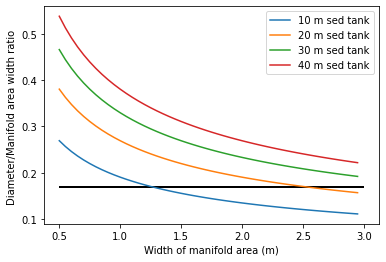

In [0]:
HL_diff_FSP = 5*u.cm # This variable can change to optimize the design 


#### Sensitivity analysis of headloss to different sized manifolds
#### Plotting different manifold characteristics
#calculate diameter, flow rate and head loss for a range of manifold lengths
w_sed_unit = 1*u.m # this variable can be changed here to see how the graph responds
n_test_values = 45
D=[]
lengths=[]
headloss=[]
Q=[]
manifold_sed_ratio = []
for length_sed in np.linspace(1 , n_test_values  , n_test_values)*u.m:
 # edited the manifold function to add the desired headloss in diffusers 
  manifold_d = manifold( max_V , w_sed_unit , length_sed  , Ratio_flow, HL_diff_FSP)
  n_diffusers = round(( length_sed/ manifold_d[2]).to(u.dimensionless))
  lengths.append(length_sed.magnitude) # first column in array is for length (in meters)
  D.append(manifold_d[0].magnitude) # second column in array is for manifold diameter (in inches)
  Q.append(manifold_d[1].magnitude) # third column in array is for flow rate (in L/s)
  # Head loss equation we need to use is the one for manifolds
  # Within that equation we cannot call manifold_FSP because that variable contains the values for the length specified outside of this for loop
  # instead we should reference manifold_d[0] and manifold_d[1]
  hl = ((ac.headloss_manifold(manifold_d[1], manifold_d[0], length_sed, KMinor_manifold, Nu, Roughness, n_diffusers )).to(u.cm)) # hl in cm
  manifold_sed_ratio.append((manifold_d[0]/w_sed_unit).to(u.dimensionless))
  headloss.append(hl.magnitude)

## plot diameter vs headloss and flow rate for each manifold length
fig, ax1 = plt.subplots()
ax1.set_xlabel('Manifold Length (m)')
ax1.set_ylabel('Diameter (in)', color='red')
ax1.plot(lengths, D, color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  #create a second y axis 

ax2.set_ylabel('Head Loss (cm)', color='blue')  #
ax2.plot(lengths, headloss, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax1.twinx()  #create a second y axis 

ax3.set_ylabel('Flow Rate (L/s)', color='green')  #
ax3.plot(lengths, Q, color='green')
ax3.tick_params(axis='y', labelcolor='green')
ax3.spines["right"].set_position(("axes", 1.3))

w=width_section/u.m
plt.title('%i m wide manifold area' %w)
fig.tight_layout()  
plt.show()


#Generate manifolds with different widths from peak to peak of the triangles

length_sed_unit_FSP = 20*u.m 
widths=[]
headloss=[]
d_w_ratio=[]

for w in np.arange(0.1,4,.1)*u.m:
  # edited the manifold function to add the desired headloss in diffusers 
  manifold_d = manifold( max_V , w , length_sed_unit_FSP  , Ratio_flow, HL_diff_FSP)
  n_diffusers = round(( length_sed_unit_FSP/ manifold_d[2]).to(u.dimensionless))
  widths.append(w.magnitude) 
  # Head loss equation we need to use is the one for manifolds
  # Within that equation we cannot call manifold_FSP because that variable contains the values for the length specified outside of this for loop
  # instead we should reference manifold_d[0] and manifold_d[1]
  hl = ((ac.headloss_manifold(manifold_d[1], manifold_d[0], length_sed_unit_FSP, KMinor_manifold, Nu, Roughness, n_diffusers)).to(u.cm)) # hl in cm
  d_w_ratio.append((manifold_d[0]/w).to(u.dimensionless))
  headloss.append(hl.magnitude)

## plot width/diameter ratio and headloss for each manifold area width
fig, ax1 = plt.subplots()
ax1.set_xlabel('Width of Sedimentaton Section (m)')
ax1.set_ylabel('Head Loss (cm)', color='red')
ax1.plot(widths, headloss, color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  #create a second y axis 

ax2.set_ylabel('Diameter/Width Ratio', color='blue')  #
ax2.plot(widths, d_w_ratio, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
plt.title(str(length_sed_unit_FSP)+' sed tank')
fig.tight_layout()  
plt.show()

### combine to plot headloss and diameter/width area for manifolds of different lenghts and area widths
lengths=[10,20,30,40]
for l in lengths:
  l=l*u.m
  d_w_ratio=[]
  headloss=[]
  widths=[]
  for w in np.arange(0.5,3,0.05)*u.m:
    manifold_d = manifold( max_V , w , l  , Ratio_flow, HL_diff_FSP)
    n_diffusers = round(( l / manifold_d[2]).to(u.dimensionless))
    widths.append(w.magnitude) 
    # Head loss equation we need to use is the one for manifolds
    # Within that equation we cannot call manifold_FSP because that variable contains the values for the length specified outside of this for loop
    # instead we should reference manifold_d[0] and manifold_d[1]
    hl = ((ac.headloss_manifold(manifold_d[1], manifold_d[0],l, KMinor_manifold, Nu, Roughness, n_diffusers)).to(u.cm)) # hl in cm
    d_w_ratio.append((manifold_d[0]/w).to(u.dimensionless))
    headloss.append(hl.magnitude)
  l_dim=l/u.m
  string='%i m sed tank' %l_dim
  plt.figure(1)
  plt.plot(widths,headloss,label=string)
  plt.xlabel('Width of manifold area (m)')
  plt.ylabel('Headloss (cm)')
  plt.legend()
  plt.figure(2)
  string='%i m sed tank' %l_dim
  plt.plot(widths,d_w_ratio,label=string)
  plt.xlabel('Width of manifold area (m)')
  plt.ylabel('Diameter/Manifold area width ratio ')
  plt.hlines(0.17,0.5,3 , 'black',)
  plt.legend()

#Reflections (Monroe's)

We need a methodical scheme to select these parameters.

* velocity of jet (same as picking head loss of jet)
* width of valley
* length of manifold

Increased jet velocity improves assurance that resuspension of the floc blanket won't fail even at low flow rates. As long as we don't go to the super high velocities that Casey Garland tested we should be fine. Don't want to use too much energy. Given that we only have 60 cm total at Fairmont I would select a jet headloss between 1 cm and 5 cm. Make sure that velocity range is okay even when the sed tanks are operating at lower flow rates. If possible choose 5 cm.

I suspect that going to a wider valley area isn't optimal because it requires more concrete for the valleys and it requires using larger PVC pipes. The cost of PVC pipe goes up very fast as the pipe diameter increases. One option is to keep the valley width at 1 m for now.

[/Kevin/]: # (If you take a look at the first group of graphs, the one that looks at the diameter of the manifold, we actually see that you can increase the width of the valley without increasing the diameter significantly. In fact, in some scenarios a wider valley led to a smaller ratio between diameter of the pipe and tank width. This would translate to less pipe used in the entire system. However, you are right about having to use more concrete. We have not factored in the added concrete needed if we increase the width. )

Maximum Length of manifold then is set by the maximum practical diameter. I'd suggest limiting the pipe diameter to either 12 (my preference) or 16 inches. 

These pipes will need supports to hold them up for these long spans. And the pipes will come in sections and the joints will have to be designed to accommodate the continuous differs.

## Layout of Sedimentation System

The flow of water through the sedimentation tanks needs to be organized to allow for several processes. (The previous sentence doesn't tell me much. Make it clear and specific or delete it.)


It is important that certain units can be shut off efficiently so that they are no longer in use if the flow rate of the plant is low or for repairs. Additionally, the water should not be completely covered so that maintenance can occur in sections if something is to go wrong. An open-top system allows for easier diagnosis of issues and repair. 

Based on the above criteria, we propose the layout shown in the figure below. Influent water arrives in a main channel It is then distributed into eight smaller channels that bisect each sedimentation unit. The number of channels will change if we decide to change the amount of sedimentation tanks in use. Water will then flow through manifold pipes into the sedimentation tanks, where it will enter the system through diffusers. Water now only needs to travel through twenty meters of pipe maximum rather than fourty. After water flows through the sedimentation tanks, it flows over the top of the opposite side of where it came from, into a channel that leads to a larger channel, and then out of the system. 

<p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/Sed_Hyd_Layout.png?raw=1" height=300>
</p>
<p align="center">

[/Monroe/]: # (If you put this image in your image folder and link to it then it won't have this long ugly text string. see https://github.com/MWSteams/4590FSP/tree/master/Images/Sedimentation_Hydraulic)



I like this layout. A single gate can then turn off a sedimentation tank.

##Dimensions of Sedimentation System

In order to ensure proper sedimentation within the tanks, the velocity of the influent water must be controled properly. If the velocity is too high, flocs have the potential of breaking up and being less likely to settle. If the velocity it too slow however, the flocs may settle within the influent velocity channel where they cannot be removed. It was determined that the velocity should range from 0.15 m/s to 0.45 m/s, so the influent channels must be designed with this in mind. 

[/Claudia/]: # (not sure where we got the velocity range values, need to discuss later to find a source)

Below is the design roughly to scale with the new dimensions. The effluent channels can be smalled though because they do not need to abide by the volocity constraints

<p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/Sed_Layout_Scale.png?raw=1" height=300>
</p>
<p align="center">

In [0]:
flow_rate = 720 * u.ft**3/u.s
v_max = 0.45 * u.m/u.s

#we use a tentative depth that will roughly equal the sedimentation depth and adjust later
depth_sed = 3 * u.m

#using the maximum flow,we determine minumum area
width_min = flow_rate/(v_max*depth_sed)
print('The minumum width of the influent channel is', width_min.to(u.m))

#we use this width to see how low of a flow rate ca be used to still meet the minimum velocity
#If these dimensions of the tank cover a wide range of flow rates, it will work
#we can also turn off sed tank units to adjust flow
v_min = 0.15 * u.m/u.s
flow_min = v_min*depth_sed*width_min
print('The minimum flow rate that this size influent channel can handle without turning off a sedimentation tank is', flow_min.to(u.ft**3/u.s))

#size of smalled channels leading to sed tanks
width_small = width_min/8
print('The smaller channels will have a width of', width_small.to(u.m))

The minumum width of the influent channel is 15.1 meter
The minimum flow rate that this size influent channel can handle without turning off a sedimentation tank is 240 foot ** 3 / second
The smaller channels will have a width of 1.888 meter


## Plate Settlers

The length of plate settlers is important to determine because if they are too short, insufficient amounts of particles will have time to settle and be captured, and if they are too long, excess space in the plant will be given to them. As shown in the **Physics** section above, the equation to determine theideal length of the plate settlers is$$L = \frac{S\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}-1\right) + T\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}\right)}{sin\alpha cos\alpha}$$ 


From the [Fairmont Sedimentation Plant Scope of Work](file:///C:/Users/Claudia/Downloads/Fairmont%20Sedimentation%20Plant%20Scope%20of%20Work%20_FINAL%2006-01-17.pdf), we are given a surface loading rate for plate settlers of 0.5 gpm/ft^2, or 0.339mm/s. This will be interpreted as the capture velocity for the plate settlers. The value of $v_{z_{Plate}}$ will currently be the maximum upflow velocity of the sedimentation tanks, however this may change if the determined length of the plate settlers is significantly long. This is because on one end of the sedimentation tank will be a "lost triangle" section caused by the angle of the sedimentation plates. A length equivalent to $L{cos\alpha}$ will be removed from the active length, making the $v_{z_{Plate}}$ larger than if the entire length was useable. ${\alpha}$ will be the AguaClara standard of 60 degrees. 

In order to determine the minimum spacing between tube settlers, we will use the equation


$$S_{min} \approx \frac{3 D_0}{sin^2\alpha} \frac{\bar v_{z_{Plate}}}{v_c}  \left( \frac{18 v_c \Phi \nu }{D_0^2g} \frac{ \rho_{H_2O}}{ \rho_{floc_0} - \rho_{H_2O}} \right) ^{\frac{1}{ D_{fractal} - 1}}$$

from the [AguaClara textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Derivations.html?highlight=slide#equation-sedimentation-sed-derivations-46). Because the properties of the flocs entering the sedimetation system are still unknown, we will use clay clay flocs as a filler value of density until more information is known

Using these minimum values found, we can then look at vendor information to find plates that fit the general requirements. Once foud, we can adjust and recalculate the values to ensure they will meet the guidelines selected


+find minumum floc that will settle

[/Monroe/]: # (The worst case for this plant will be when the raw water turbidity is close to zero and I suspect that happens. They will still need to dose to remove arsenic and so they will end up with ferric hydroxide flocs. We don't yet have a method to predict the properties of those flocs and so I think it would be prudent to use the standard spacing of 5 cm AND recommend a pilot study to measure the minimum plate spacing. )

In [0]:
#Minimum spacing between plates
#must change input values once more is known about ferric chloride

#don't redefine constants. Just use them as already defined.
#grav=1*u.gravity 

water_density = ac.density_water(temp)
Nu = ac.viscosity_kinematic_water(temp)
Clay_Density = 2650 * u.kg/u.m**3 
Clay_D = 5 * u.um 
Floc_D = 0.15 * u.mm 
D_Fractal = 2.3
v_z = 1.6* u.mm/u.s ##may need to adjust
alpha = 60
v_capture = fmt.hydraulic_loading_rate
Nu = ac.viscosity_kinematic_water(temp)

S_min = (3*Clay_D)/(np.sin(alpha))**2*(v_z/v_capture)*((18*v_capture*Nu*(45/24))/(Clay_D**2*u.gravity)*(water_density/(Clay_Density-water_density))**(1/(D_Fractal-1)))
print('The minimum spacing required is' ,S_min.to(u.cm))

#Minimum length required

thickness = 1 * u.cm #very arbitrary, look into vendors
S = S_min

length_min = (S*(v_z/v_capture-1)+ thickness*(v_z/v_capture))/(np.sin(alpha)*np.cos(alpha))
print('The minimum length of the plate settlers is', length_min.to(u.cm))


#Minimum diameter of floc captured

Min_D = Clay_D*(((v_capture*18*(45/24)*Nu*water_density)/(Clay_D**2*u.gravity*(Clay_Density-water_density)))**(1/(D_Fractal-1)))
print('The smallest diameter of clay that this design of a plate settler could capture is', Min_D.to(u.mm))

The minimum spacing required is 2.748 centimeter
The minimum length of the plate settlers is 51.36 centimeter
The smallest diameter of clay that this design of a plate settler could capture is 0.07219 millimeter
